<h1> On the length of the sequence in Collatz Conjecture </h1>

*We use a python program to study the length of the sequence generated by the Collatz conjecture for n. We observe that the length is always smaller than $16 \log(n,2)$. We check that this upper limit holds valid for ten tousands $n$ randomely chosen in the range of $(2,10^{10^4})$.*

# Introduction

Consider the following operation on an arbitrary positive integer:

* If the number is even, divide it by two.
* If the number is odd, triple it and add one.

In modular arithmetic notation, define the function function f as follows:

$$f(n) = \begin{cases} \frac{n}{2} &\text{if } n \equiv 0 \pmod{2}\\[4px] 3n+1 & \text{if } n\equiv 1 \pmod{2}.\end{cases}$$

Now form a sequence by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input at the next.

The conjecture is that these sequences always reach 1, no matter which positive integer is chosen to start the sequence from. 

<b>Here, we report an upper limit on the length of the sequence.</b>

# Testing the conjecture

To start, let us wrire a python program to test the conjecture. 

The program gets a number from the user and test if the  Collatz conjecture is true. 



We define function <a>get_input</a> that reads the input number. The input number is an interger. Integer numbers do not have an upper bound in python 3. Integers are only bounded by the size of the meomory of the system.

We also define function <a>test_conjecture</a> to test the conjecture for given input number.

In [ ]:
import matplotlib.pyplot as plt
import random
import math 
import numpy as np

def get_input(message):
    while True:
        initial_value  = input(message)
        try:
            initial_value = int(initial_value)
        except ValueError:
            print ('Enter a valid number, please')
            continue
        if initial_value  > 1:
            return initial_value
            break

Next we define the function <a>test_conjecture</a> to test the conjecture for n. The output of this function is tuple. If the conjecture be true, this function returns True as well as the sequence for n. If the conjecture is wrong, the function would be trapped in an infinite loop. 

In [ ]:
def test_conjecture(n):
    A=[n]
    while True :
        if n==1:
            return True, A
            break
        if n%2==0:
            n= n//2
            A.append(n)
        else:
            n= 3*n+1
            A.append(n)


Now let us interact with the user and ask the user to enter a positive integer number. The number can be very large.

The program tests if the Collatz conjecture is correct for the input number. It depicts the sequence for the input number. 

Please enter a positive integer:6787
The conjecture is True for 6787.


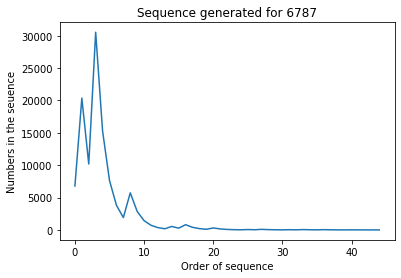

Number 6787 reaches  1 after 44 steps.
Sequence is [6787, 20362, 10181, 30544, 15272, 7636, 3818, 1909, 5728, 2864, 1432, 716, 358, 179, 538, 269, 808, 404, 202, 101, 304, 152, 76, 38, 19, 58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [ ]:
ini_value= get_input("Please enter a positive integer:")
test_result, steps= test_conjecture(ini_value)

print("The conjecture is {} for {}.".format(test_result, ini_value))

plt.plot(steps)
plt.ylabel('Numbers in the seuence')
plt.xlabel('Order of sequence')
plt.title('Sequence generated for {}'.format(ini_value))
plt.show()
print("Number {} reaches  1 after {} steps.".format(ini_value,len(steps)-1))

if len(steps)<200:
    print("Sequence is {}".format(steps))


It appears the length of the sequence is icreasing very slowly as the input number increases. We can test that the growth is almost logarithmic. Now lets see how the length of sequence is changes as we increase the input number. We plot the length of the sequence for numbers from 1 to 1000,000. 

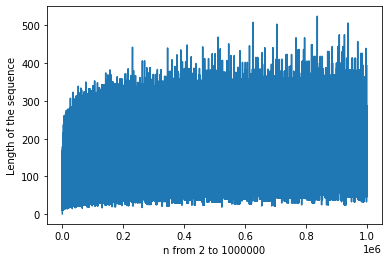

In [ ]:
max = 1000000
list_of_length_sequence=[] #

for n in range(2, max):
    list_of_length_sequence.append(len(test_conjecture(n)[1])-1)
    
#print(S)

plt.plot(list_of_length_sequence)
plt.ylabel('Length of the sequence')
plt.xlabel('n from 2 to {}'.format(max))
plt.show()

This graph shows that length of the sequence in term of n increases logarithmically 

# Upper bound on the length of the sequence

Let's check the growth of the length of the sequence in the range of $1$ to $10^{\text{max}}$. 

We choose max$=1000$.  We choose $1000$ random in integers in the range of $1$ to $10^{1000}$. We plot length of the sequence versus $\log(n,10)$ 

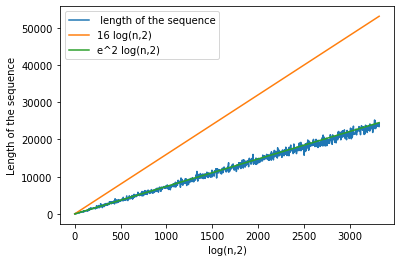

In [ ]:
max = 1000 # 
Y=[]
X=[]
upper_bound=[]
upper_bound_8=[]
for n in range(1, max):
    # generate a seed between 10^(n-1) and 10^n
    seed =  random.randrange(10**(n-1)+1, 10**(n)+1)
    log_seed=math.log(seed,2)
    X.append(log_seed) 
    Y.append(len(test_conjecture(seed)[1])-1)
    upper_bound.append(16*log_seed)
    upper_bound_8.append((math.e)**2*log_seed)

plt.plot(X,Y, label=' length of the sequence')
plt.plot(X, upper_bound, label='16 log(n,2)')
plt.plot(X, upper_bound_8, label='e^2 log(n,2)')
plt.ylabel('Length of the sequence')
plt.xlabel('log(n,2)')
plt.legend()
plt.show()

This shows that the length of the sequence for $n$ can be approximated to $e^2 \log(n,2)$, and is always smaller than $16 \log(n,2)$. 

We can use this finding to update test_conjec function to return a false statement instead of running in an infinite loop should the conjecture be false.


The following cell define <a>test_conj</a> wherein there is not an infinite loop by definition. It asks the user for a large integer number and it reports if the conjecture is true.  

In [ ]:
def test_conj(n):
    sequence=[n]
    max_number_steps= int(16* math.log(n,2))+1
    result_of_test=False
  

    for i in range(1,max_number_steps):
      i+=1
      if n==1:
         result_of_test=True
         break
      elif n%2==0:
         n = n//2
         sequence.append(n)
      else:
         n= 3*n+1
         sequence.append(n) 
    return result_of_test, sequence 


print("The conjecture is {} for the above chosen number."\
      .format(test_conj(get_input("Please enter a very large natural namber:"))[0]))

Please enter a very large natural namber:678
The conjecture is True for the above chosen number.


We can test that the conjecture, and the found upper bound on the length of the sequence is true for a random number in range of $10^{10^{\text{max}}}$ and $10^{10^{\text{max}}+1}$ for any given max.

The following cell tests the conjecture for max=4 for 10,000 instants of n.

In [ ]:
max=4

test_numbers=10 #You can not reach 10000 in the free google colab because it takes about 10 hours. Download it and run it on your machine.   

result=True
for i in range(1,test_numbers):
  if not test_conj(random.randint(10, 10**(10**max)))[0]:
    result=False
    break

print("The upper bound tested for {} times in the range of (1,10^(10^{})). It has been found to be {}.".format(test_numbers,max,result))

The upper bound tested for 10 times in the range of (1,10^(10^4)). It has been found to be True.


# Conclusion

We have studied the length of the sequence generated by the Collatz Conjecture. We have written a python program to find the upper limit on the length of the sequence generated for the Collatz conjecture for radom numbers in range of $(1,10^{1001})$. We have observed that the length of the sequence can be approximated to $e^2 \log(n,2)$, and is always smaller than $16 \log(n,2)$. 


We have checked that the length of the sequence for $n$, as 10,000 instants of a random number in the range up to $10^{10^{4}}$, is always smaller than $16 \log(n,10)$.

Written  by Qasem Exirifard, [uOttawa](https://https://uniweb.uottawa.ca/members/4503).
 

# Notes



This finding should be considered as an excercise in python and jupyter notebook.